# Data Science Regression Project: Predicting Home Prices in Banglore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

KeyError: 'society'

In [5]:
df1.drop(['availability','society'],axis='columns',inplace=True)

In [6]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
dummies=pd.get_dummies(df1.area_type)
merged=pd.concat([df1,dummies],axis='columns')
df1=merged.drop(['area_type'],axis='columns')

In [8]:
df1.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,1
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,1


In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-14-681cf3aca53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [12]:
df3 = df1.dropna()
df3.isnull().sum()

location                0
size                    0
total_sqft              0
bath                    0
balcony                 0
price                   0
Built-up  Area          0
Carpet  Area            0
Plot  Area              0
Super built-up  Area    0
dtype: int64

In [15]:
df3.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,1,0,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,1,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,1,2


In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,0,0,0,1,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,0,0,0,1,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,0,0,0,1,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,0,0,0,1,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,0,0,0,1,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,0,0,0,1,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,0,0,0,1,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,0,0,0,1,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,1,0,0,0,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,0,0,0,1,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [19]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4


In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1,2,4250.000000


In [22]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [23]:
df5.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1,2,4250.000000


In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                         514
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     259
Thanisandra                        233
                                  ... 
T R Mill Road                        1
Ganganahalli                         1
Kengeri Satellite Town Stage II      1
Banasawadi,                          1
BAGUR                                1
Name: location, Length: 1248, dtype: int64

In [25]:
location_stats.values.sum()

12668

In [26]:
len(location_stats[location_stats>10])

235

In [27]:
len(location_stats)

1248

In [31]:
len(location_stats[location_stats<=10])

1013

In [29]:
location_stats.describe()

count    1248.000000
mean       10.150641
std        29.017895
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       514.000000
Name: location, dtype: float64

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                      10
Basapura                           10
Kodigehalli                        10
Kalkere                            10
Ganga Nagar                        10
                                   ..
T R Mill Road                       1
Ganganahalli                        1
Kengeri Satellite Town Stage II     1
Banasawadi,                         1
BAGUR                               1
Name: location, Length: 1013, dtype: int64

In [33]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [34]:
df5['bhk_per_sqft'] = df5['total_sqft']/df5['bhk']
df5.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft,bhk_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1,2,4250.000000,600.0


In [42]:
df5['bhk_per_sqft'].describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
Name: bhk_per_sqft, dtype: float64

In [53]:
df6=df5[~(df5.bhk_per_sqft<200)]
df6.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft,bhk_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1,2,4250.000000,600.0


In [54]:
df6.shape

(12386, 13)

In [57]:
df5[df5.bhk_per_sqft>1000].head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft,bhk_per_sqft
60,other,3 Bedroom,4395.0,3.0,2.0,240.0,0,0,1,0,3,5460.750853,1465.000
62,Whitefield,4 Bedroom,5700.0,5.0,3.0,650.0,0,0,1,0,4,11403.508772,1425.000
122,Hebbal,4 BHK,5611.5,4.0,0.0,477.0,0,0,0,1,4,8500.400962,1402.875
163,Whitefield,4 Bedroom,4200.0,4.0,2.0,420.0,1,0,0,0,4,10000.000000,1050.000
248,other,3 Bedroom,4050.0,3.0,2.0,280.0,0,0,1,0,3,6913.580247,1350.000


In [58]:
df6=df6[~(df6.bhk_per_sqft>1000)]
df6.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft,bhk_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1,2,4250.000000,600.0


In [59]:
df6.shape

(12054, 13)

In [62]:
df6.groupby('location').bhk_per_sqft.describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
1st Block Jayanagar,11.0,519.166667,176.887833,200.000000,450.000000,600.000000,621.250000,712.5
1st Phase JP Nagar,19.0,616.929825,133.667077,300.000000,534.250000,653.750000,697.000000,840.0
2nd Phase Judicial Layout,11.0,482.000000,70.123700,350.000000,450.000000,450.000000,542.666667,575.0
2nd Stage Nagarbhavi,19.0,340.394737,171.893586,200.000000,240.000000,250.000000,375.000000,800.0
5th Phase JP Nagar,35.0,548.480272,105.380487,250.000000,497.500000,540.000000,600.000000,800.0
...,...,...,...,...,...,...,...,...
Yelahanka,200.0,577.573958,112.913906,200.000000,519.666667,574.333333,650.250000,1000.0
Yelahanka New Town,39.0,539.801282,168.665271,275.000000,450.000000,500.000000,622.500000,1000.0
Yelenahalli,12.0,571.111111,39.789365,500.000000,542.083333,579.750000,600.000000,630.0


In [63]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9897, 13)

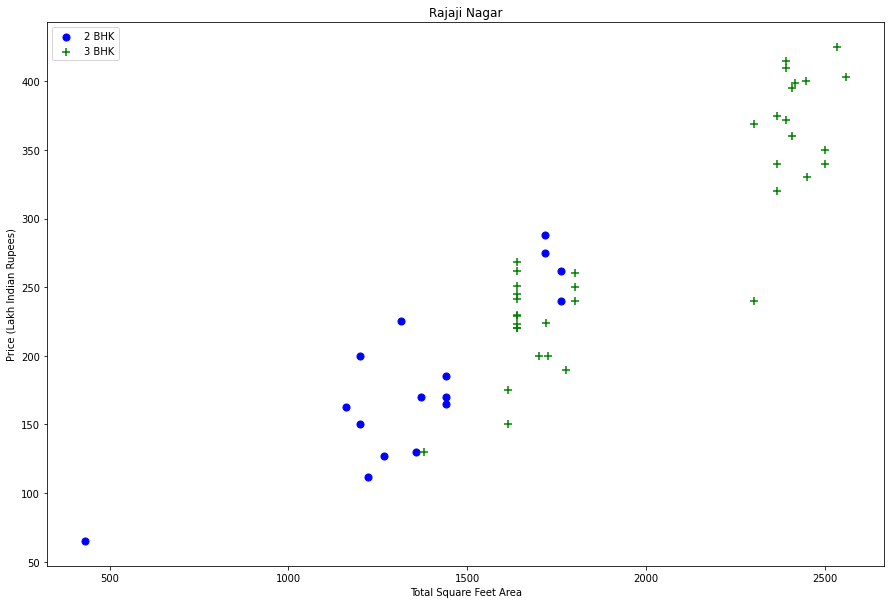

In [64]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [65]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6988, 13)

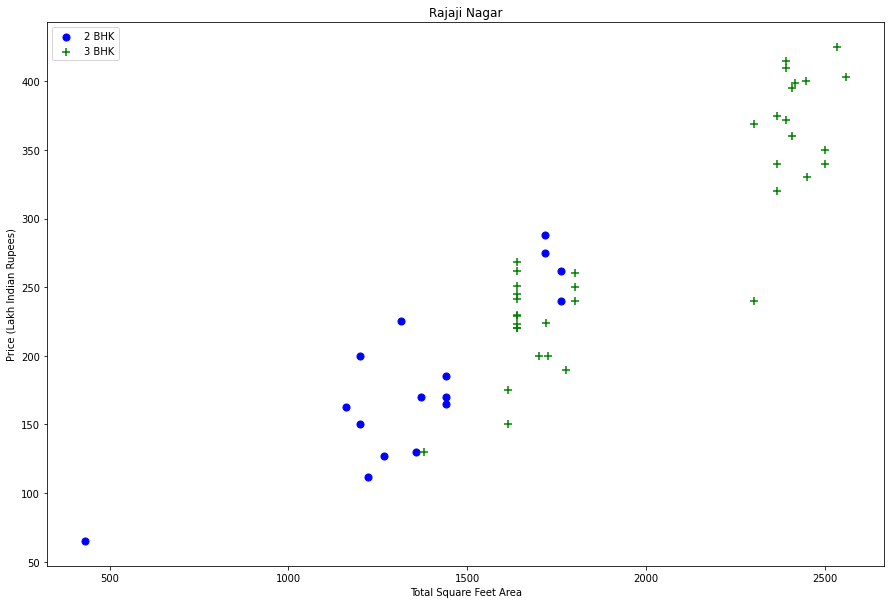

In [66]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

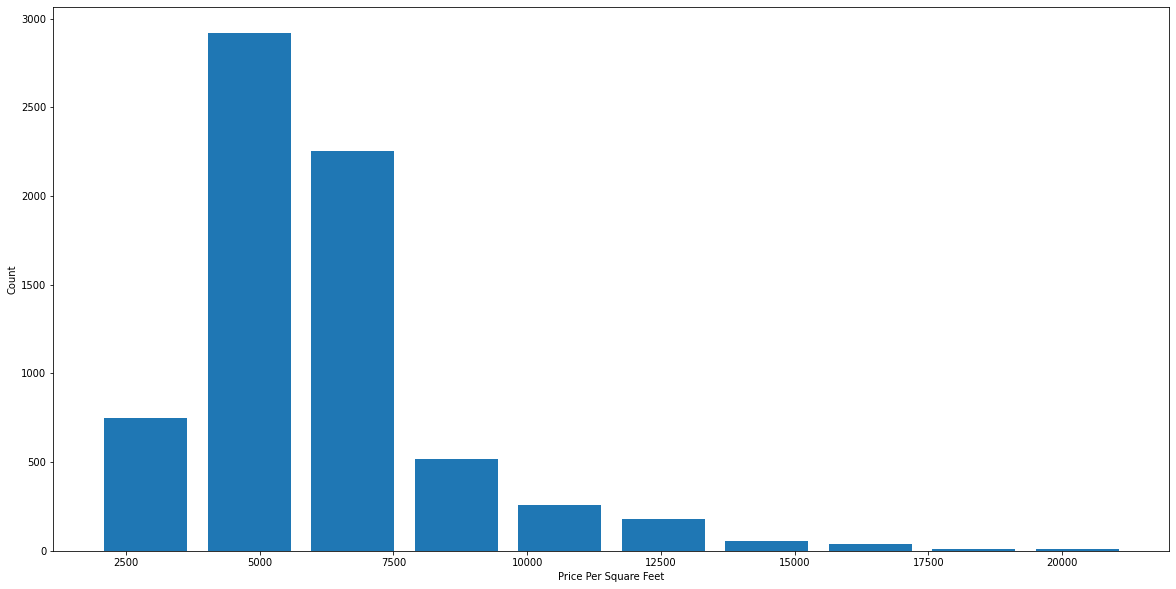

In [67]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [68]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 27., 13.])

Text(0, 0.5, 'Count')

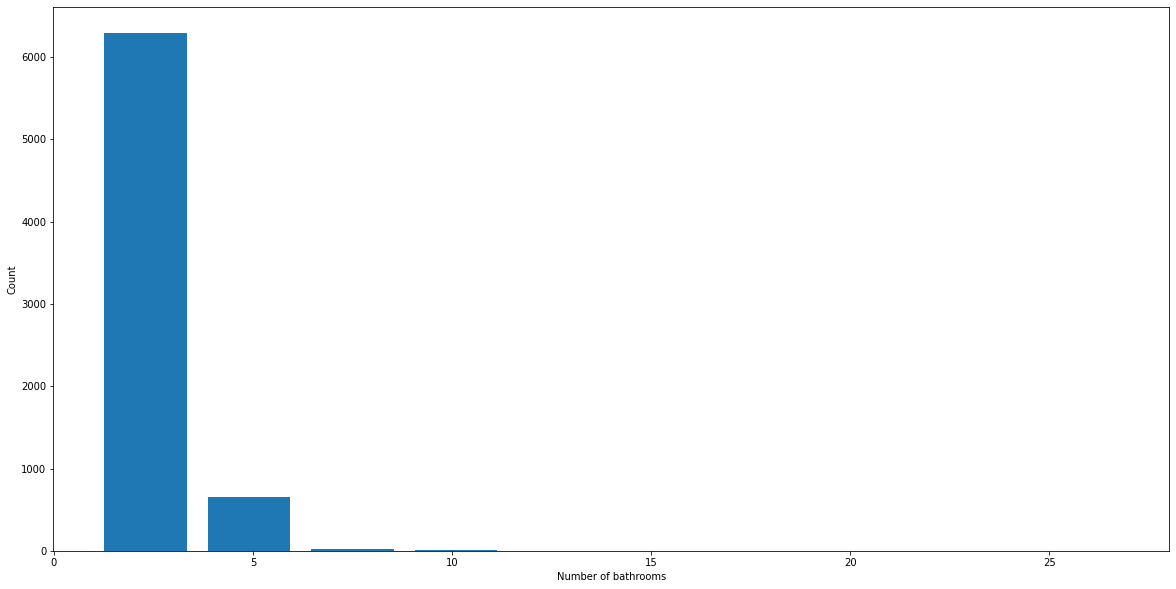

In [69]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [70]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,price_per_sqft,bhk_per_sqft
1476,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,0,0,1,0,6,15333.333333,250.0
1608,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,1,0,0,0,4,3252.032520,615.0
6487,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,0,0,0,1,3,6423.034330,602.0
9319,other,6 Bedroom,1200.0,9.0,3.0,122.0,0,0,1,0,6,10166.666667,200.0


In [71]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6932, 13)

In [72]:
df10 = df9.drop(['size','price_per_sqft','bhk_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,0,1,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,0,1,3
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,0,0,0,1,6


In [73]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,0,0,0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df12.shape

(6932, 244)

In [77]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,0,0,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,0,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,0,0,0,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    125.0
Name: price, dtype: float64

In [79]:
len(y)

6932

In [80]:
X.shape

(6932, 243)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [82]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8651157022679399

In [83]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84538405, 0.8470503 , 0.83433063, 0.83485559, 0.85206641])

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.836294,{'normalize': True}
1,lasso,0.668984,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.699279,"{'criterion': 'mse', 'splitter': 'best'}"


In [93]:
lr_clf = LinearRegression(normalize=True)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.865133430996109

In [94]:
import pickle
with open('banglore_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [95]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))